In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# Load the dataset
file_path = 'Uncleaned_employees_final_dataset.csv'  # Update with your file path
data = pd.read_csv(file_path)

In [3]:
# Initial Data Preprocessing
# Insight: Filling missing values in 'education' with 'Unknown' ensures that all employees are considered in the analysis.
data['education'].fillna('Unknown', inplace=True)
# Insight: Imputing missing 'previous_year_rating' with median preserves the central tendency.
data['previous_year_rating'].fillna(data['previous_year_rating'].median(), inplace=True)

C:\Users\hariharan.s2\AppData\Local\Temp\ipykernel_22484\3199977523.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education'].fillna('Unknown', inplace=True)
C:\Users\hariharan.s2\AppData\Local\Temp\ipykernel_22484\3199977523.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [4]:
# EDA: Visualizations
sns.set(style="whitegrid")

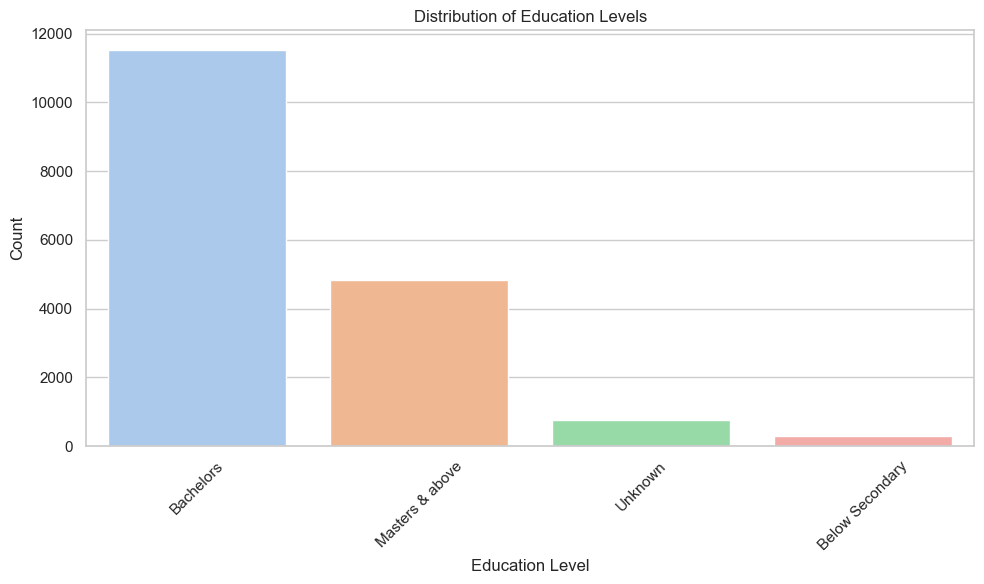

In [5]:
# 1. Distribution of Education Levels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', palette='pastel', edgecolor='w')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insight: Most employees have a Bachelor's degree, followed by Master's. This suggests a workforce with substantial formal education. 'Unknown' category also suggests missing or unspecified data which could affect training or development programs.

C:\Users\hariharan.s2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


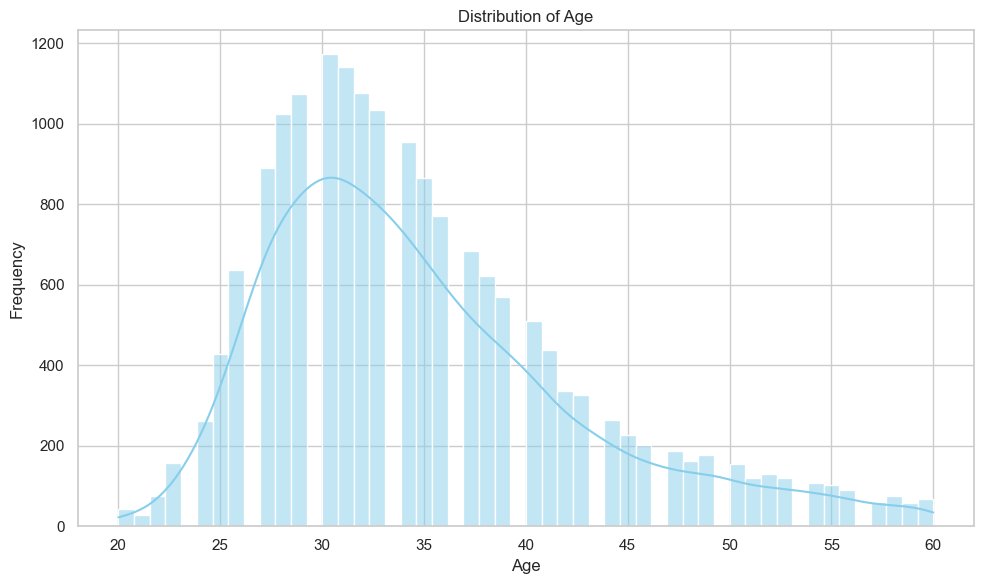

In [6]:
# 2. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color='skyblue', edgecolor='w')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Insight: The age distribution is slightly right-skewed, with a peak around 30-35 years, indicating a younger workforce. Few employees are above 50, suggesting a focus on younger talent or recent hiring trends.

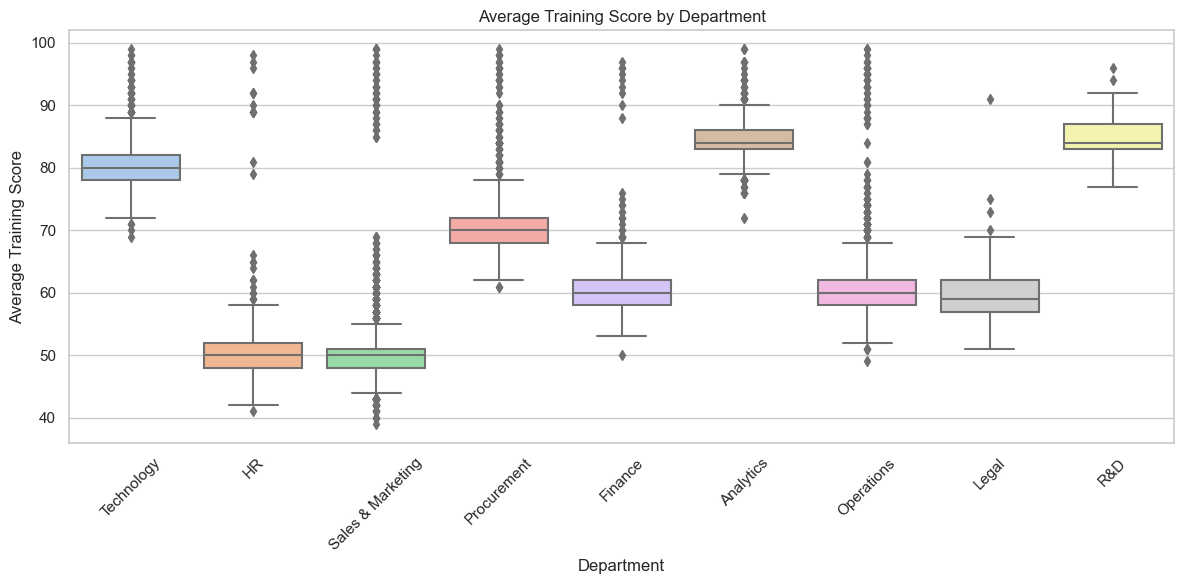

In [7]:
# 3. Average Training Score by Department
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='department', y='avg_training_score', palette='pastel')
plt.title('Average Training Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Training Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight: Departments like Technology and R&D show more variability in training scores, while HR and Finance are more consistent. This could indicate differing levels of training engagement or diverse skill requirements across departments.

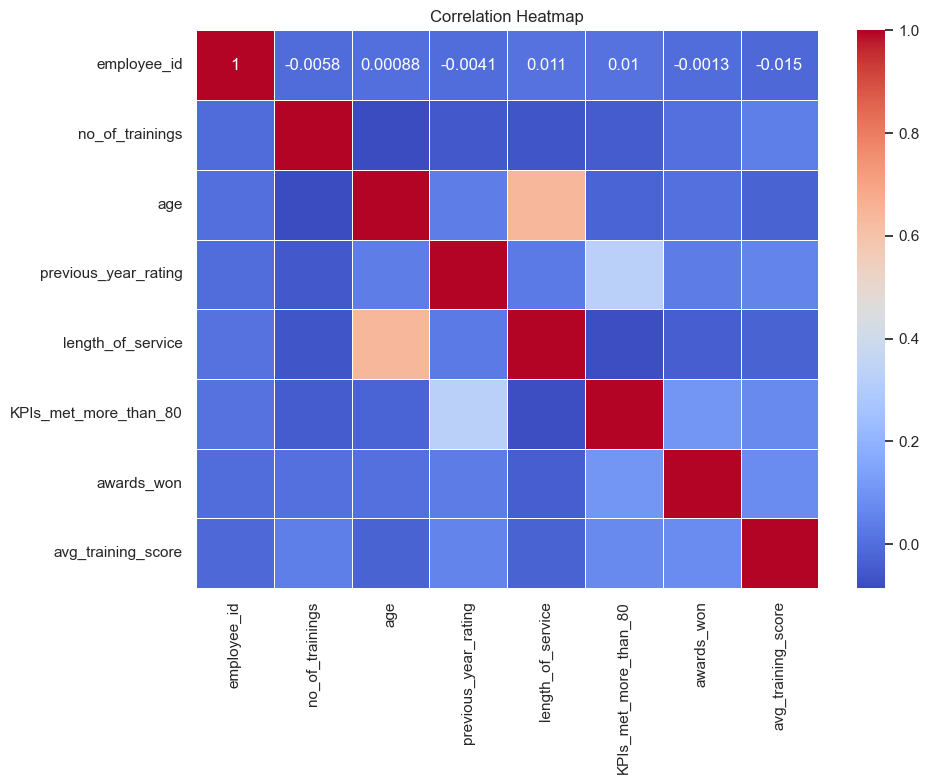

In [9]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Insight: Weak correlations among most features suggest that employee characteristics like age, length of service, and training scores are largely independent. Clustering could reveal hidden patterns not immediately obvious from direct correlations.

In [10]:
# Feature selection for PCA and Clustering
features = data.select_dtypes(include=[np.number]).drop(columns=['employee_id'])

In [11]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
# Applying PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_features)

In [13]:
# Explained Variance by PCA
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PCA Components: {explained_variance}")

Explained Variance by PCA Components: [0.23877551 0.19931381]


Insight: The first two principal components explain a significant portion of the variance in the data, making them suitable for visualization and dimensionality reduction.

In [14]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_transformed)

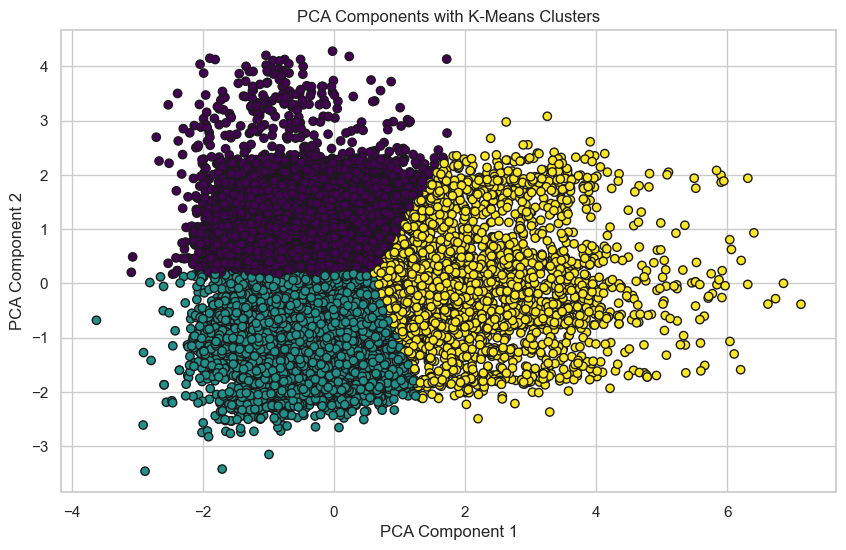

In [15]:
# Visualizing PCA Components with K-Means Clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.title('PCA Components with K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

Insight: Clustering in the reduced PCA space shows three distinct groups of employees. These clusters could correspond to different employee profiles or segments based on combined attributes like age, training score, and length of service.

In [16]:
# Cumulative Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
print(f"Cumulative Explained Variance: {explained_variance_ratio}")

Cumulative Explained Variance: [0.23877551 0.43808932]


Insight: The cumulative explained variance shows how much information is retained with the two principal components. If the explained variance is high, the PCA effectively summarizes the data with minimal loss of information.

In [17]:
# Feature contributions to PCA components
loadings = pca.components_.T
pca_df = pd.DataFrame(loadings, columns=['PCA1', 'PCA2'], index=features.columns)
print("Top Features contributing to PCA1 and PCA2:")
print(pca_df)

Top Features contributing to PCA1 and PCA2:
                           PCA1      PCA2
no_of_trainings       -0.152219 -0.146792
age                    0.689347  0.074562
previous_year_rating   0.026706  0.636774
length_of_service      0.692542  0.020670
KPIs_met_more_than_80 -0.103372  0.656996
awards_won            -0.062056  0.275544
avg_training_score    -0.082254  0.243753


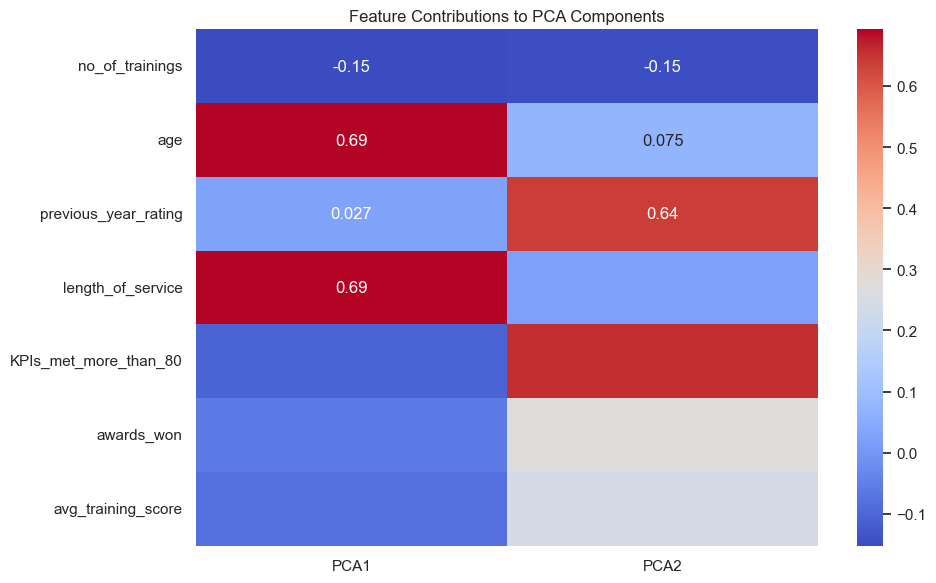

In [18]:
# Visualizing the feature contributions
plt.figure(figsize=(10, 6))
sns.heatmap(pca_df, annot=True, cmap='coolwarm')
plt.title('Feature Contributions to PCA Components')
plt.tight_layout()
plt.show()

### Insight: The heatmap shows which original features contribute most to each principal component. This helps interpret what the PCA components represent and how they relate to original variables like 'age', 'training score', etc.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# Select PC1 if it explains more variance; otherwise, PC2
best_pc_index = np.argmax(explained_variance)
best_pc = pca_transformed[:, best_pc_index]

In [21]:
# Add the selected principal component to the dataframe
data['best_pc'] = best_pc

In [22]:
# Define the target variable (e.g., predicting KPI met status)
target = 'KPIs_met_more_than_80'  # Change this if predicting a different outcome
X = data[['best_pc']]
y = data[target]

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Define a RandomForest model
rf_model = RandomForestClassifier(random_state=42)

In [25]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
   'n_estimators': [100, 200, 300],
   'max_depth': [None, 10, 20, 30],
   'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [26]:
# Best model from grid search
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
# Predicting on the test set
y_pred = best_model.predict(X_test)

In [28]:
# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.97      0.78      2253
           1       0.54      0.07      0.12      1231

    accuracy                           0.65      3484
   macro avg       0.60      0.52      0.45      3484
weighted avg       0.62      0.65      0.55      3484

Confusion Matrix:
[[2184   69]
 [1149   82]]


## Insights:
### 1. **Best Principal Component**: The component with the highest explained variance is used for prediction.

### 2. **Model Performance**: The classification report provides insights into precision, recall, and F1-score, indicating how well the model performs.

### 3. **Hyperparameter Tuning**: The best parameters found via GridSearchCV help improve model accuracy by optimizing for the given dataset.

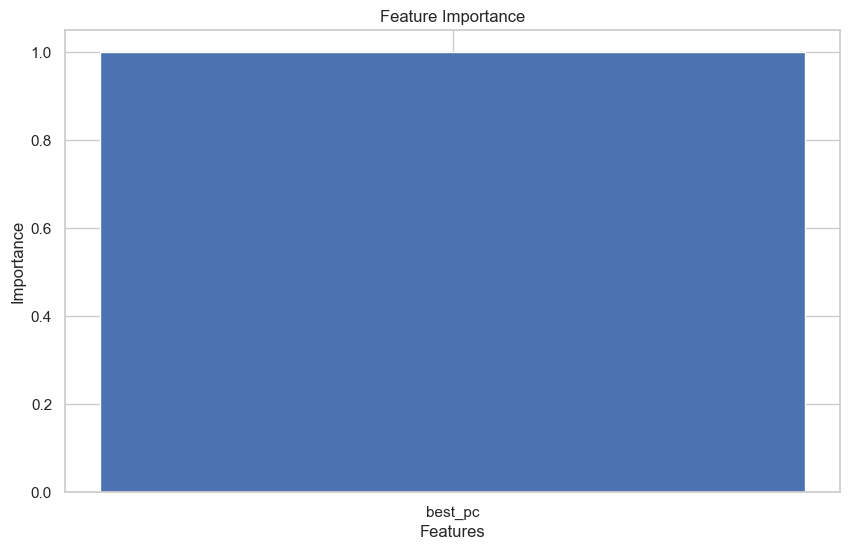

In [29]:
# Plotting Feature Importances (If applicable, using another model)
if hasattr(best_model, 'feature_importances_'):
   importances = best_model.feature_importances_
   plt.figure(figsize=(10, 6))
   plt.bar(X.columns, importances)
   plt.title('Feature Importance')
   plt.xlabel('Features')
   plt.ylabel('Importance')
   plt.show()

## Additional Insights:
#### - **Feature Importance**: Provides information on which features (in this case, the best principal component) contribute most to the prediction.